In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import random, os

In [2]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("Tensorflow version:", tf.__version__)
print("GPU Availabe:" , tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.19.0
GPU Availabe: []


In [3]:
from google.colab import files
uploaded = files.upload()


Saving gsc_content_analytics_dataset_IT_2000.xlsx to gsc_content_analytics_dataset_IT_2000.xlsx


In [4]:
df = pd.read_excel("gsc_content_analytics_dataset_IT_2000.xlsx")

In [5]:
features = ['impressions','avg_position','word_count', 'avg_time_on_page_seconds','bounce_rate','backlinks','readibility_score']

In [6]:
target ='ctr'

features = [f for f in features if f in df.columns]
df = df.dropna(subset=[target])
print("Using features:", features)

Using features: ['impressions', 'avg_position', 'word_count', 'avg_time_on_page_seconds', 'bounce_rate', 'backlinks']


In [7]:
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 40,
    batch_size = 32,
    verbose = 1
)

Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.6318 - mae: 0.4311 - val_loss: 0.2245 - val_mae: 0.1390
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1752 - mae: 0.0938 - val_loss: 0.1415 - val_mae: 0.0357
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1232 - mae: 0.0295 - val_loss: 0.1400 - val_mae: 0.0278
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1211 - mae: 0.0245 - val_loss: 0.1394 - val_mae: 0.0269
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1185 - mae: 0.0223 - val_loss: 0.1388 - val_mae: 0.0267
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1187 - mae: 0.0226 - val_loss: 0.1384 - val_mae: 0.0264
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1200 - mae: 0.0227 - val_loss: 0.1379 - val_mae: 0.0265
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1181 - mae: 0.0222 - val_loss: 0.1379 - val_mae: 0.0259
Epoch 9/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1177 - mae

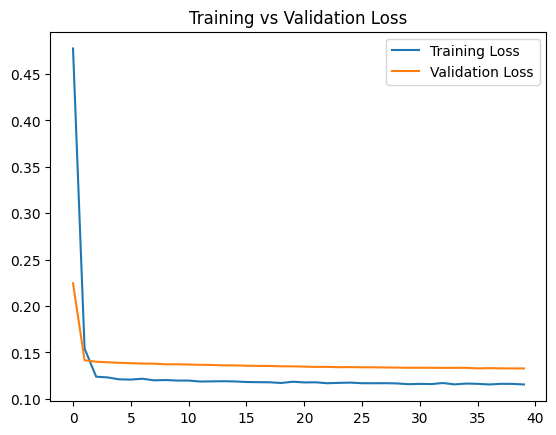

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [11]:
y_pred = model.predict(X_test).ravel()


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE:  {mse:.2f}")
print(f"Test MAE:  {mae:.2f}")
print(f"Test R2:   {r2:.4f}" )

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Test MSE:  0.00
Test MAE:  0.02
Test R2:   -0.0282


<function matplotlib.pyplot.show(close=None, block=None)>

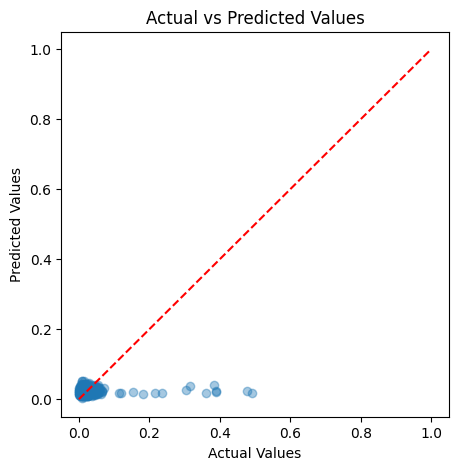

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([0,1],[0,1],'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show

In [13]:
model.save("save_ctr_model.keras")

out_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

out_df.to_excel("simple_ctr_predictions.xlsx", index=False)
print("Model and predictions saved successfully!")

Model and predictions saved successfully!


In [14]:
from google.colab import files
files.download("simple_ctr_predictions.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>